In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import hvplot.pandas
import warnings
warnings.filterwarnings("ignore")

In [2]:
aggregateStats =[
    "data/Uber-Jan-Feb-FOIL.csv",
   "data/other-FHV-services_jan-aug-2015.csv"
]

raw_data_uber = pd.read_csv(aggregateStats[0])

raw_data_uber.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,01-01-2015,190,1132
1,B02765,01-01-2015,225,1765
2,B02764,01-01-2015,3427,29421
3,B02682,01-01-2015,945,7679
4,B02617,01-01-2015,1228,9537


In [3]:
raw_data_other = pd.read_csv(aggregateStats[1])
raw_data_other.head()

,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles
0,B00013,LOVE CORP CAR INC,01/01/2015,26,17
1,B00014,NY ONE CORP CAR INC,01/01/2015,45,24
2,B00029,COMMUNITY CAR SVC CORP,01/01/2015,731,36
3,B00053,CHARGE AND RIDE INC,01/01/2015,10,9
4,B00095,LIBERTY CAR SERVICE INC.,01/01/2015,814,62


# Data Cleaning (Uber)

In [4]:
# Renaming
raw_data_uber.rename(columns={'dispatching_base_number': 'Base'}, inplace=True)
raw_data_uber.rename(columns={'date': 'Date'}, inplace=True)
raw_data_uber.rename(columns={'trips': 'Number of trips'}, inplace=True)

raw_data_uber.head()

,Base,Date,active_vehicles,Number of trips
0,B02512,01-01-2015,190,1132
1,B02765,01-01-2015,225,1765
2,B02764,01-01-2015,3427,29421
3,B02682,01-01-2015,945,7679
4,B02617,01-01-2015,1228,9537


In [5]:
# Handling data value types:
#print(raw_data_uber.info())

#print("After data converstion")

data = {'Date': raw_data_uber["Date"]}
datetime = pd.DataFrame(data)

# Convert date columns to datetime dtype
raw_data_uber['Date'] = pd.to_datetime(datetime['Date'])

#print(raw_data_uber.info())

In [6]:
# Finding Duplicates 
print(raw_data_uber.count())

print("After removing duplicates:")
non_dupe_data_uber = raw_data_uber.drop_duplicates()
print(non_dupe_data_uber.count())

Base               354
Date               354
active_vehicles    354
Number of trips    354
dtype: int64
After removing duplicates:
Base               354
Date               354
active_vehicles    354
Number of trips    354
dtype: int64


In [7]:
# Handling Missing Values
non_dupe_data_uber = non_dupe_data_uber.dropna()

non_na_data_uber = non_dupe_data_uber.dropna(axis=1)

print(non_na_data_uber.count())

Base               354
Date               354
active_vehicles    354
Number of trips    354
dtype: int64


In [8]:
# Renaming to finalized dataframe
uber_data = non_na_data_uber
uber_data.head()

,Base,Date,active_vehicles,Number of trips
0,B02512,2015-01-01,190,1132
1,B02765,2015-01-01,225,1765
2,B02764,2015-01-01,3427,29421
3,B02682,2015-01-01,945,7679
4,B02617,2015-01-01,1228,9537


# Data Cleaning (Other)

In [9]:
# Renaming
raw_data_other.rename(columns={'Base Number': 'Base'}, inplace=True)
raw_data_other.rename(columns={'Pick Up Date': 'Date'}, inplace=True)
raw_data_other.rename(columns={'Number of Trips': 'Number of trips'}, inplace=True)

raw_data_other.head()

,Base,Base Name,Date,Number of trips,Number of Vehicles
0,B00013,LOVE CORP CAR INC,01/01/2015,26,17
1,B00014,NY ONE CORP CAR INC,01/01/2015,45,24
2,B00029,COMMUNITY CAR SVC CORP,01/01/2015,731,36
3,B00053,CHARGE AND RIDE INC,01/01/2015,10,9
4,B00095,LIBERTY CAR SERVICE INC.,01/01/2015,814,62


In [10]:
# Finding Duplicates 
print(raw_data_other.count())

print("After removing duplicates:")
non_dupe_data_other = raw_data_other.drop_duplicates()
print(non_dupe_data_other.count())

Base                  26181
Base Name             26181
Date                  26181
Number of trips       26181
Number of Vehicles    26181
dtype: int64
After removing duplicates:
Base                  26181
Base Name             26181
Date                  26181
Number of trips       26181
Number of Vehicles    26181
dtype: int64


In [11]:
# Handling Missing Values
non_dupe_data_other = non_dupe_data_other.dropna()

non_na_data_other = non_dupe_data_other.dropna(axis=1)

# Remove entries with "-" in "Number of Vehicles"
non_na_data_other = non_na_data_other[non_na_data_other["Number of Vehicles"] != " -   "]

print(non_na_data_other.count())

Base                  24465
Base Name             24465
Date                  24465
Number of trips       24465
Number of Vehicles    24465
dtype: int64


In [12]:
# Handling data value types:
print(non_na_data_other.info())

print("After data converstion")

data = {'Date': non_na_data_other["Date"]}
datetime = pd.DataFrame(data)

# Convert date columns to datetime dtype
non_na_data_other['Date'] = pd.to_datetime(datetime['Date'])
non_na_data_other["Number of trips"] = non_na_data_other["Number of trips"].str.replace(',', '').str.strip().astype(int)
non_na_data_other["Number of Vehicles"] = non_na_data_other["Number of Vehicles"].astype(int)

print(non_na_data_other.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24465 entries, 0 to 26180
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Base                24465 non-null  object
 1   Base Name           24465 non-null  object
 2   Date                24465 non-null  object
 3   Number of trips     24465 non-null  object
 4   Number of Vehicles  24465 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB
None
After data converstion
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24465 entries, 0 to 26180
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Base                24465 non-null  object        
 1   Base Name           24465 non-null  object        
 2   Date                24465 non-null  datetime64[ns]
 3   Number of trips     24465 non-null  int32         
 4   Number of Vehicles  24465 non-null  int

In [13]:
# Renaming to finalized dataframe
other_data = non_na_data_other
other_data.head()

,Base,Base Name,Date,Number of trips,Number of Vehicles
0,B00013,LOVE CORP CAR INC,2015-01-01,26,17
1,B00014,NY ONE CORP CAR INC,2015-01-01,45,24
2,B00029,COMMUNITY CAR SVC CORP,2015-01-01,731,36
3,B00053,CHARGE AND RIDE INC,2015-01-01,10,9
4,B00095,LIBERTY CAR SERVICE INC.,2015-01-01,814,62


# Data Summary (Uber)

In [14]:
# All base names
bases = uber_data["Base"].unique()

In [15]:
# Total bases
base_count = uber_data["Base"].nunique()

In [16]:
# total trips 
num_trips_per_base = uber_data.groupby("Base")["Number of trips"].sum()

In [17]:
# maximum trips
max_trips_per_base = uber_data.groupby("Base")["Number of trips"].max()

In [18]:
# minimum trips
min_trips_per_base = uber_data.groupby("Base")["Number of trips"].min()

In [19]:
# Date Range
start_date = uber_data["Date"].min()
end_date = uber_data["Date"].max()

In [20]:
# Total Days
total_days = len(uber_data["Date"].unique())

In [21]:
# Average Trips per Day
avg_trips_per_day = num_trips_per_base / total_days

In [22]:
# Most Active Day
most_active_dates_idx = uber_data.groupby('Base')['Number of trips'].idxmax()
most_active_dates = uber_data.loc[most_active_dates_idx, 'Date']

# Set the index to "Base" and rename the index
most_active_dates.index = most_active_dates_idx.index
most_active_dates.index.name = 'Base'

# Least Active Day
least_active_dates_idx = uber_data.groupby('Base')['Number of trips'].idxmin()
least_active_dates = uber_data.loc[least_active_dates_idx, 'Date']

# Set the index to "Base"
least_active_dates.index = least_active_dates_idx.index
least_active_dates.index.name = 'Base'

In [23]:
# maximum trips
max_active_vehicles = uber_data.groupby("Base")["active_vehicles"].max()

# minimum trips
min_active_vehicles = uber_data.groupby("Base")["active_vehicles"].min()

In [24]:
uber_summary = pd.DataFrame({
    "Base": bases,
    "Total Trips": num_trips_per_base,
    "Maximum Trips": max_trips_per_base,
    "Minimum Trips": min_trips_per_base,
    "Start Date": start_date,
    "End Date": end_date,
    "Total Days": total_days,
    "Average Trips/Day": avg_trips_per_day,
    "Most Active Day": most_active_dates,
    "Least Active Day": least_active_dates,
    "Max Active Vehicles": max_active_vehicles,
    "Min Active Vehicles": min_active_vehicles,
})

uber_summary = uber_summary.set_index("Base")

uber_summary

,Total Trips,Maximum Trips,Minimum Trips,Start Date,End Date,Total Days,Average Trips/Day,Most Active Day,Least Active Day,Max Active Vehicles,Min Active Vehicles
Base,,,,,,,,,,,
B02512,93786,2408,629,2015-01-01,2015-02-28,59,1589.593220,2015-02-13,2015-01-27,281,112
B02765,540791,13062,2957,2015-01-01,2015-02-28,59,9165.949153,2015-02-13,2015-01-27,1216,434
B02764,725025,16999,4325,2015-01-01,2015-02-28,59,12288.559322,2015-02-14,2015-01-27,1590,596
B02682,662509,16448,4414,2015-01-01,2015-02-28,59,11228.966102,2015-02-14,2015-01-27,1523,600
B02617,1914449,45858,11998,2015-01-01,2015-02-28,59,32448.288136,2015-02-14,2015-01-27,4395,1619
B02598,193670,7824,921,2015-01-01,2015-02-28,59,3282.542373,2015-02-20,2015-01-27,786,135


Text(0, 0.5, 'Number of Trips')

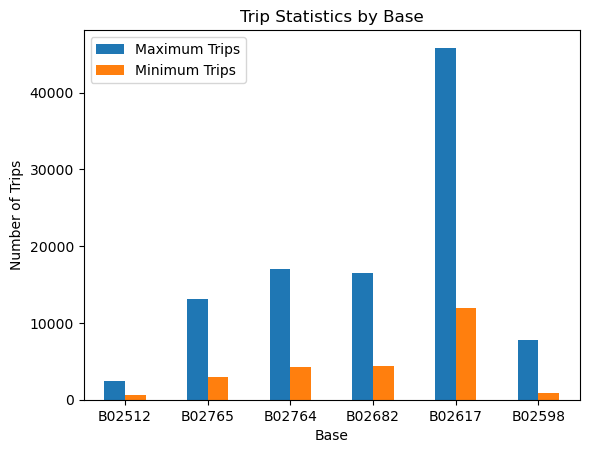

In [27]:
# Create a DataFrame with the provided data
data = {'Base': ['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
        
        'Maximum Trips': [2408, 13062, 16999, 16448, 45858, 7824],
        'Minimum Trips': [629, 2957, 4325, 4414, 11998, 921]}
df = pd.DataFrame(data)

# Create a bar chart
ax = df.plot.bar(x='Base', y=[ 'Maximum Trips', 'Minimum Trips'], rot=0)

# Set the chart title and axis labels
ax.set_title('Trip Statistics by Base')
ax.set_xlabel('Base')
ax.set_ylabel('Number of Trips')



# Data Summary (Other)

In [28]:
# All base names
bases = other_data["Base"].unique()

In [29]:
# Total bases
base_count = other_data["Base"].nunique()

In [30]:
# total trips 
num_trips_per_base = other_data.groupby("Base")["Number of trips"].sum()

In [31]:
# maximum trips
max_trips_per_base = other_data.groupby("Base")["Number of trips"].max()

In [32]:
# minimum trips
min_trips_per_base = other_data.groupby("Base")["Number of trips"].min()

In [33]:
# Date Range
start_date = other_data["Date"].min()
end_date = other_data["Date"].max()

In [34]:
# Total Days
total_days = len(other_data["Date"].unique())

In [35]:
# Average Trips per Day
avg_trips_per_day = num_trips_per_base / total_days

In [36]:
# Most Active Day
most_active_dates_idx = other_data.groupby('Base')['Number of trips'].idxmax()
most_active_dates = other_data.loc[most_active_dates_idx, 'Date']

# Set the index to "Base" and rename the index
most_active_dates.index = most_active_dates_idx.index
most_active_dates.index.name = 'Base'

# Least Active Day
least_active_dates_idx = other_data.groupby('Base')['Number of trips'].idxmin()
least_active_dates = other_data.loc[least_active_dates_idx, 'Date']

# Set the index to "Base"
least_active_dates.index = least_active_dates_idx.index
least_active_dates.index.name = 'Base'

In [37]:
# maximum trips
max_active_vehicles = other_data.groupby("Base")["Number of Vehicles"].max()

# minimum trips
min_active_vehicles = other_data.groupby("Base")["Number of Vehicles"].min()

In [38]:
other_summary = pd.DataFrame({
    "Base": bases,
    "Total Trips": num_trips_per_base,
    "Maximum Trips": max_trips_per_base,
    "Minimum Trips": min_trips_per_base,
    "Start Date": start_date,
    "End Date": end_date,
    "Total Days": total_days,
    "Average Trips/Day": avg_trips_per_day,
    "Most Active Day": most_active_dates,
    "Least Active Day": least_active_dates,
    "Max Active Vehicles": max_active_vehicles,
    "Min Active Vehicles": min_active_vehicles,
})

other_summary = other_summary.set_index("Base")

other_summary

,Total Trips,Maximum Trips,Minimum Trips,Start Date,End Date,Total Days,Average Trips/Day,Most Active Day,Least Active Day,Max Active Vehicles,Min Active Vehicles
Base,,,,,,,,,,,
B00013,27287,2135,1,2015-01-01,2015-08-31,243,112.292181,2015-07-07,2015-07-01,33,1
B00014,26287,616,82,2015-01-01,2015-08-31,243,108.176955,2015-06-16,2015-07-12,22,7
B00029,54145,564,26,2015-01-01,2015-08-31,243,222.818930,2015-02-04,2015-01-01,120,17
B00053,76795,810,45,2015-01-01,2015-08-31,243,316.028807,2015-02-04,2015-01-01,184,24
B00095,26998,1296,604,2015-01-01,2015-08-31,243,111.102881,2015-05-09,2015-05-19,75,53
...,...,...,...,...,...,...,...,...,...,...,...
B02453,7868,286,238,2015-01-01,2015-08-31,243,32.378601,2015-06-02,2015-06-15,20,20
B02460,12668,612,268,2015-01-01,2015-08-31,243,52.131687,2015-07-03,2015-07-09,107,67
B02610,25342,1137,215,2015-01-01,2015-08-31,243,104.288066,2015-01-31,2015-01-27,123,72


Text(0, 0.5, 'Number of Trips')

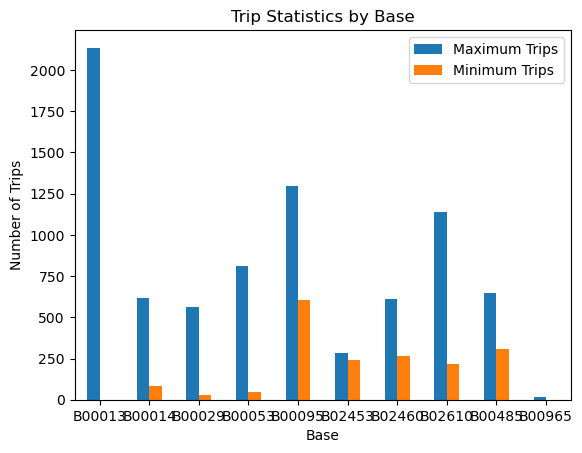

In [40]:
# Create a DataFrame with the provided data
data = {
    'Base': ['B00013', 'B00014', 'B00029', 'B00053', 'B00095', 'B02453', 'B02460', 'B02610', 'B00485', 'B00965'],
    
    'Maximum Trips': [2135, 616, 564, 810, 1296, 286, 612, 1137, 649, 14],
    'Minimum Trips': [1, 82, 26, 45, 604, 238, 268, 215, 306, 1]
}
df = pd.DataFrame(data)

# Set the 'Base' column as the index
df.set_index('Base', inplace=True)

# Create a grouped bar chart
ax = df.plot(kind='bar', rot=0)

# Set the chart title and axis labels
ax.set_title('Trip Statistics by Base')
ax.set_xlabel('Base')
ax.set_ylabel('Number of Trips')

# Output Results

In [41]:
#dataframe into csv 
uber_data.to_csv('Data/uber_data_janfeb_FOIL_2015.csv', index=False)
other_data.to_csv('Data/other_data_FHV_janaug_2015.csv', index=False)

uber_summary.to_csv('Data/uber_summary_janfeb_FOIL_2015.csv', index=False)
other_summary.to_csv('Data/other_summary_FHV_janaug_2015.csv', index=False)